**Spartahack X** 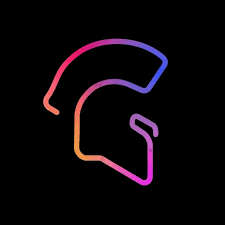

In [1]:
!pip install pandas numpy tensorflow kaggle joblib librosa

  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 260.1/260.1 kB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/74.9 kB ? eta -:--:--
   ---------------------------------------- 74.9/74.9 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------- ------------------------------ 0.7/2.8 MB 20.8 MB/s eta 0:00:01
   ----------------------- ---------------- 1.7/2.8 MB 21.4 MB/s eta 0:00:01
   ------------------------------------- -- 2.7/2.8 MB 21.2 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 18.1 MB/s eta 0:00:00
   ---------------------

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\tyoneyam\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\tyoneyam\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from google.colab import files
import os

# Upload kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json to the .kaggle directory
!mv kaggle.json ~/.kaggle/

# Set permissions to secure the API key
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d birdy654/deep-voice-deepfake-voice-recognition --unzip

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
birdy654/deep-voice-deepfake-voice-recognition                   DEEP-VOICE: DeepFake Voice Recognition               4GB  2023-08-24 13:12:23           7643         80  1.0              
manjilkarki/deepfake-and-real-images                             deepfake and real images                             2GB  2022-02-03 15:33:45          16104         73  0.625            
dagnelies/deepfake-faces                                         deepfake_faces                                     433MB  2020-02-02 19:44:24           6276         80  0.5882353        
khoongweihao/deepfake-xception-trained-model                

In [ ]:
import pandas as pd
import os

# for root, dirs, files in os.walk("."):
#      for file in files:
#          print(os.path.join(root, file))

df = pd.read_csv("./KAGGLE/DATASET-balanced.csv")

print(df.head())

from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and "LABEL" is the target column
X = df.drop(columns=["LABEL"])  # Features
y = df["LABEL"]  # Target

# First, split into training (80%) and temp (20%) for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you also want a validation set, split train further
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

   chroma_stft       rms  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.338055  0.027948        2842.948867         4322.916759  6570.586186   
1     0.443766  0.037838        2336.129597         3445.777044  3764.949874   
2     0.302528  0.056578        2692.988386         2861.133180  4716.610271   
3     0.319933  0.031504        2241.665382         3503.766175  3798.641521   
4     0.420055  0.016158        2526.069123         3102.659519  5025.077899   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.041050 -462.169586   90.311272  19.073769  24.046888  ...   
1            0.047730 -409.413422  120.348808  -7.161531   5.114784  ...   
2            0.080342 -318.996033  120.490273 -24.625771  23.891073  ...   
3            0.047180 -404.636749  136.320908   2.308172  -3.907071  ...   
4            0.051905 -410.497925  152.731400 -18.266771  51.993462  ...   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17 

**Train Model**

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # Import the SVC class
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report

scaler = StandardScaler()

# Fit on training data and transform all splits
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create SVM classifier with RBF kernel (good default choice)
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

y_val_pred = svm_model.predict(X_val)

# Print accuracy
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Print detailed classification report
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9952254641909815
              precision    recall  f1-score   support

        FAKE       1.00      0.99      1.00       929
        REAL       0.99      1.00      1.00       956

    accuracy                           1.00      1885
   macro avg       1.00      1.00      1.00      1885
weighted avg       1.00      1.00      1.00      1885



In [5]:
y_test_pred = svm_model.predict(X_test)

# Print accuracy
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Print classification report
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.9940577249575552
              precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99      1193
        REAL       0.99      1.00      0.99      1163

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356



# Test Model on Generated DeepFakes

In [7]:
import librosa
import numpy as np
from google.colab import files
from sklearn.preprocessing import StandardScaler
from moviepy.editor import VideoFileClip
import os

# Function to extract features from an audio file
def extract_features(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Extract features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr).mean()
    rms = librosa.feature.rms(y=y).mean()
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y).mean()

    # Extract MFCCs (20 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc_means = [np.mean(mfcc) for mfcc in mfccs]  # Mean of each MFCC coefficient

    # Combine all features into a single array
    features = np.hstack([
        chroma_stft, rms, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, *mfcc_means
    ])

    return features

# Function to extract audio from MP4 and save as WAV
def extract_audio_from_mp4(mp4_path, wav_path):
    # Load the video file
    video = VideoFileClip(mp4_path)

    # Extract audio
    audio = video.audio

    # Save audio as WAV
    audio.write_audiofile(wav_path)

    # Close the video file
    video.close()

# Prompt the user to upload a file
uploaded = files.upload()

# Get the file path of the uploaded file
file_path = list(uploaded.keys())[0]

# Check if the uploaded file is an MP4
if file_path.endswith('.mp4'):
    # Extract audio from MP4 and save as WAV
    wav_path = file_path.replace('.mp4', '.wav')
    extract_audio_from_mp4(file_path, wav_path)

    # Use the extracted WAV file for feature extraction
    file_path = wav_path

# Extract features from the uploaded audio file
features = extract_features(file_path)

# Reshape the features to match the input shape of the model
features = features.reshape(1, -1)

# Scale the features using the same scaler used during training
features_scaled = scaler.transform(features)

# Predict using the trained SVM model
prediction = svm_model.predict(features_scaled)

# Output the prediction
print(f"The uploaded audio file is predicted to be: {prediction[0]}")

# Clean up: Remove the temporary WAV file if it was created
if file_path.endswith('.wav') and os.path.exists(file_path):
    os.remove(file_path)

Saving Alex-2025_01_30-1.wav to Alex-2025_01_30-1.wav


  warnings.warn(



The uploaded audio file is predicted to be: FAKE


## Save Model

In [8]:
# prompt: Save the model as pkl

import pickle
# Save the model to a file
filename = 'svm_model.pkl'
pickle.dump(svm_model, open(filename, 'wb'))

# Download the saved model file
files.download(filename)

# Save scalar
filename = 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

# Download the saved model file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
!pip install flask flask-ngrok flask-cors joblib

from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
from flask_cors import CORS
import joblib
import numpy as np

app = Flask(__name__)
CORS(app)  # Allows your frontend to send requests
run_with_ngrok(app)  # Exposes Colab API to the internet

# Load your trained SVM model and scaler
model = joblib.load("svm_model.pkl")
scaler = joblib.load("scaler.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.json  # Get JSON input from frontend
        features = np.array(data["features"]).reshape(1, -1)

        # Standardize input features
        features_scaled = scaler.transform(features)

        # Predict (1 = FAKE, 0 = REAL)
        prediction = model.predict(features_scaled)
        result = "FAKE" if prediction[0] == 1 else "REAL"

        return jsonify({"prediction": result})

    except Exception as e:
        return jsonify({"error": str(e)})

# Start Flask API
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           